In [2]:
# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-v0_8') # pretty matplotlib plots

import seaborn as sns
sns.set_theme('notebook', style='whitegrid', font_scale=1.25)

# autoload changes in other files, so you don't have to restart the Jupyter kernel each time you make a change to the imported code.
%load_ext autoreload
%autoreload 2

In [27]:
import numpy as np
from experimentloop import load_data, grid_search, PARAM_GRID, pipeline

In [4]:
x_NC, y_N = load_data()
search = grid_search(x_NC, y_N, PARAM_GRID, return_train_score=True)

In [5]:
np.transpose([search.cv_results_[f'split{k}_test_roc_auc'] for k in range(5)])

array([[0.78859375, 0.75942708, 0.74104167, 0.73213542, 0.75215278],
       [0.78972222, 0.76026042, 0.74168403, 0.73310764, 0.75347222],
       [0.79411458, 0.76411458, 0.74465278, 0.73590278, 0.75777778],
       [0.80526042, 0.77331597, 0.75296875, 0.74428819, 0.76880208],
       [0.82482639, 0.79220486, 0.7725    , 0.76432292, 0.7940625 ],
       [0.84977431, 0.82541667, 0.79987847, 0.79392361, 0.83171875],
       [0.87496528, 0.85272569, 0.82470486, 0.82322917, 0.86081597],
       [0.89149306, 0.87163194, 0.83574653, 0.84534722, 0.88210069],
       [0.89765625, 0.88206597, 0.84055556, 0.855     , 0.89211806],
       [0.89741319, 0.88402778, 0.84114583, 0.85430556, 0.89309028],
       [0.89107639, 0.88395833, 0.83848958, 0.84887153, 0.88980903],
       [0.88244792, 0.88230903, 0.83649306, 0.84350694, 0.88475694],
       [0.87444444, 0.88012153, 0.83465278, 0.83805556, 0.87958333],
       [0.86760417, 0.87545139, 0.83234375, 0.83317708, 0.87411458],
       [0.86076389, 0.87045139, 0.

Text(0.5, 0, '$\\log_{10} C$')

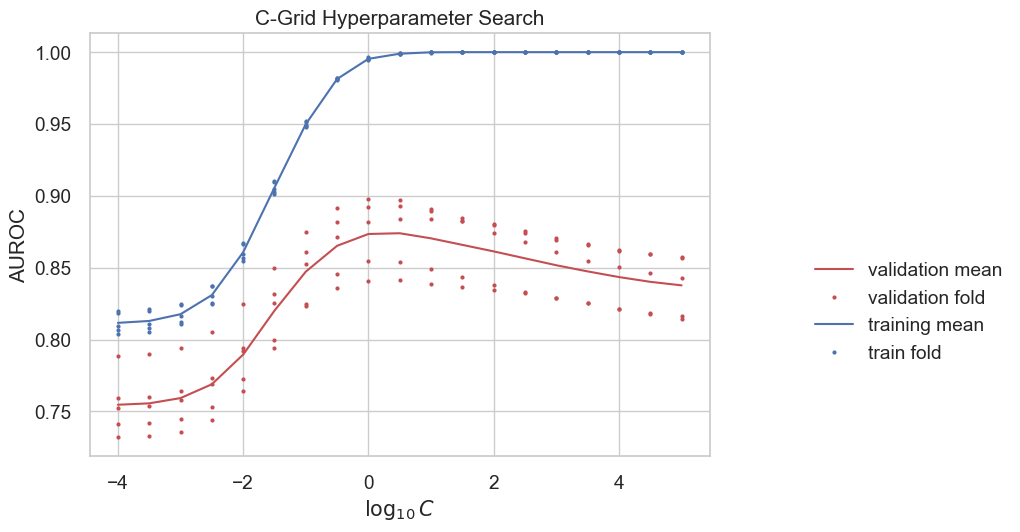

In [6]:
# first line: data points along C values for train performance
# second line: data points along C values for mean validation performance

c_grid_log = np.log10(PARAM_GRID['classify__C'])
val_performance = search.cv_results_['mean_test_roc_auc']
train_performance = search.cv_results_['mean_train_roc_auc']

val_all_folds_performance = np.transpose([search.cv_results_[f'split{k}_test_roc_auc'] for k in range(5)])
train_all_folds_performance = np.transpose([search.cv_results_[f'split{k}_train_roc_auc'] for k in range(5)])

# TODO: make legend explicit so we can avoid duplicate labels
plt.title('C-Grid Hyperparameter Search')
plt.plot(c_grid_log, val_performance, 'r-', label='validation mean')
plt.plot(c_grid_log, val_all_folds_performance, 'r.', label='validation fold')
plt.plot(c_grid_log, train_performance, 'b-', label='training mean')
plt.plot(c_grid_log, train_all_folds_performance, 'b.', label='train fold')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.5, 0.5))

plt.ylabel('AUROC')
plt.xlabel('$\log_{10} C$')

In [9]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix


X_train, X_test, y_train, y_test = train_test_split(x_NC, y_N)

best_model = search.best_estimator_

y_pred = best_model.predict(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred)

TN, FP, FN, TP = confusion_matrix.ravel()



In [30]:
from sklearn.model_selection import train_test_split, StratifiedKFold

skf = StratifiedKFold(n_splits=5)
train_ix, val_ix = next(skf.split(x_NC, y_N))

x_train_NC = x_NC.iloc[train_ix]
y_train_N = y_N.iloc[train_ix]

(y_train_N.shape,
x_train_NC.shape)

x_val_MC = x_NC.iloc[val_ix]
y_val_M = y_N.iloc[val_ix]

best_param = search.best_params_
best_param

err_analysis = pipeline()
err_analysis.set_params(**best_param)
err_analysis

err_analysis.fit(x_train_NC, y_train_N)







Pipeline(steps=[('extract_text',
                 FunctionTransformer(func=<function num_to_sp at 0x15f677130>)),
                ('featurize',
                 CountVectorizer(binary=True, strip_accents='unicode',
                                 token_pattern='(?u)\\b\\w\\w\\w+\\b')),
                ('classify',
                 LogisticRegression(C=3.1622776601683795, max_iter=400))])

In [18]:
print(y_pred)
#print(X_test)
print(X_train)

for i in range(len(y_pred)):
    if y_pred[i] == 0:
        print(y_pred[0]) 

[1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0
 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1
 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0
 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0
 1 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0
 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1
 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 1
 1 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 0
 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0
 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 1 0
 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1
 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 0
 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1
 1 1 1 1 1 1 1 0 1 0 1 1 